In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역3\\구역3_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역3\\구역3_충전소.csv',
                     encoding='utf-8')

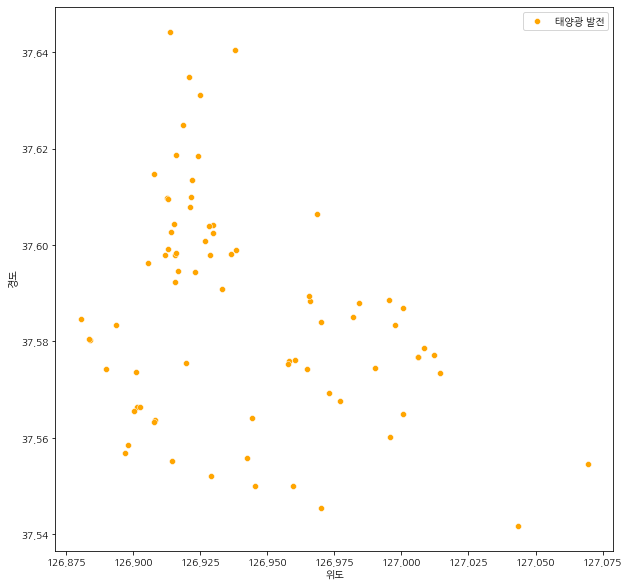

In [2]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

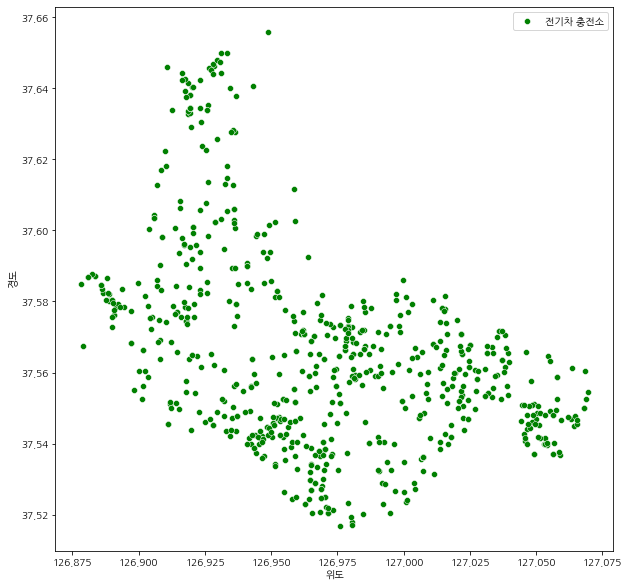

In [3]:
fig = plt.figure(figsize=(10,10))
#sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

In [4]:
import scipy as sp
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

charger_clu = charger[['y','x']]
model_ch = KMeans(n_clusters = 5, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

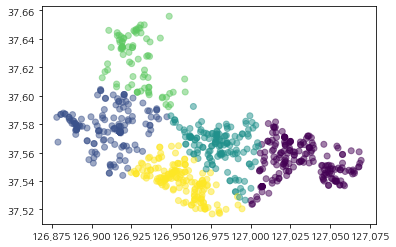

In [5]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [6]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 5, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

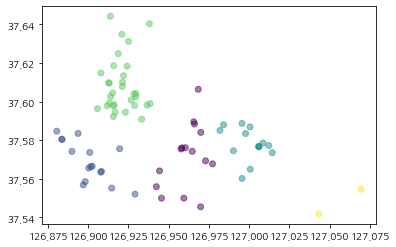

In [7]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

(array([126.9 , 126.92, 126.94, 126.96, 126.98, 127.  , 127.02, 127.04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

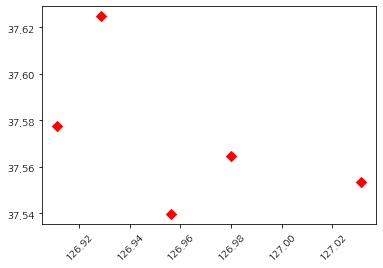

In [8]:
#충전소 centroid
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([126.88, 126.9 , 126.92, 126.94, 126.96, 126.98, 127.  , 127.02,
        127.04, 127.06, 127.08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

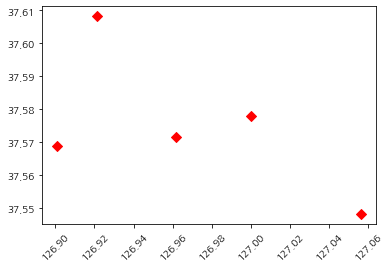

In [9]:
#태양광
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

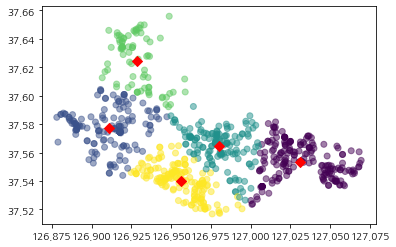

In [10]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

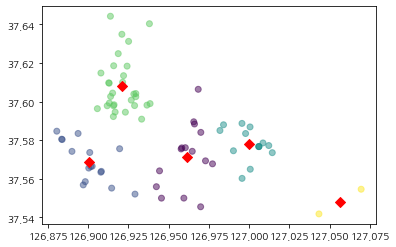

In [11]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

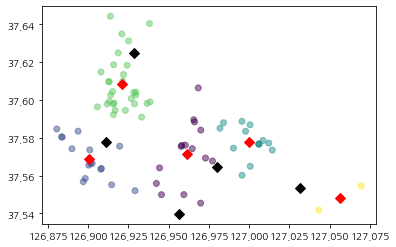

In [12]:
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.scatter(center_x,center_y,s=50,marker='D',c='black')

중점:37.57346046388547, 126.96470567890874


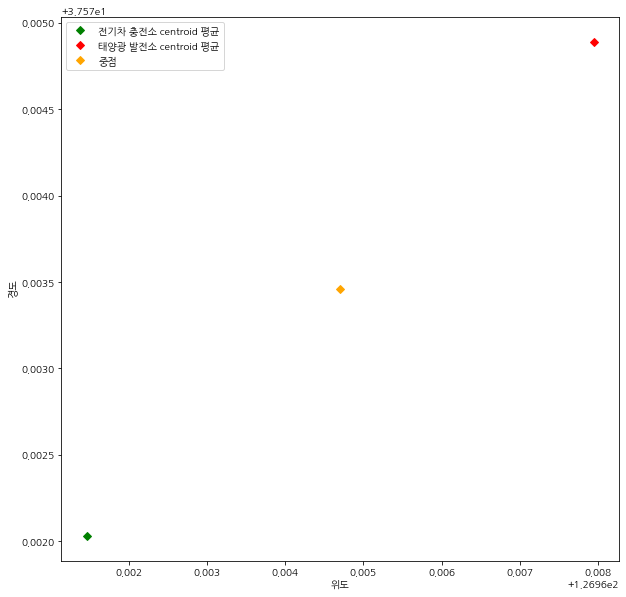

In [13]:
center_x_list = center_x.tolist()
center_y_list = center_y.tolist()

center_x_solar_list = center_x_solar.tolist()
center_y_solar_list = center_y_solar.tolist()


center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()
#종로구